<a href="https://colab.research.google.com/github/Swayamg21/DAV_Experiments_17/blob/main/DAV_EXP_2_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aim: Simple Linear Regression in Python**

# **Python :**

Task1: List the packages to be used for Simple Linear Regression in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

Task2: Download the dataset from UCI Repository / Kaggle

-- Load data into Google Colab

-- Display the summary of the dataset

In [2]:
# Load mtcars data set
df = pd.read_csv("/content/mtcars.csv")
df = df[["wt", "mpg"]]
df

,wt,mpg
0,2.620,21.0
1,2.875,21.0
2,2.320,22.8
3,3.215,21.4
4,3.440,18.7
5,3.460,18.1
6,3.570,14.3
7,3.190,24.4
8,3.150,22.8
9,3.440,19.2


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900


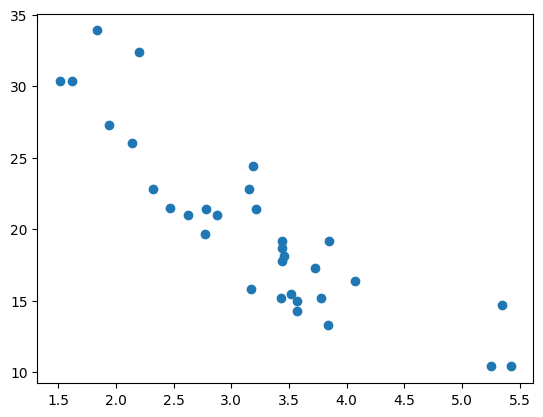

In [4]:
plt.scatter(df['wt'], df['mpg'])

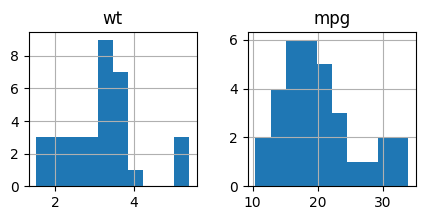

In [5]:
p = df.hist(figsize = (5,2))

Task3: Check whether the data meets the assumptions

In [6]:
df.corr()

,wt,mpg
wt,1.000000,-0.867659
mpg,-0.867659,1.000000


In [7]:
df.isnull().any(axis=0)

wt     False
mpg    False
dtype: bool

Task4: Perform Linear Regression Analysis using the identified package

In [8]:
# Select the independent variable (X) and dependent variable (y)
X = df[['wt']]
y = df['mpg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 12.475985659918818


Task 5: Visualize the results with a graph -- Draw the Simple Linear Regression line to the plotted data -- Add the equation for the Regression Line on the graph

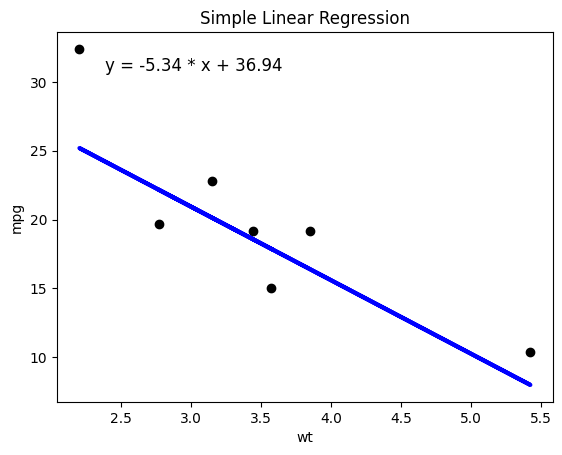

In [9]:
equation = f'y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}'
plt.text(0.2, 0.8, equation, fontsize=12, transform=plt.gcf().transFigure)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Simple Linear Regression')
plt.xlabel('wt')
plt.ylabel('mpg')
plt.show()

# **R :**

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv("/content/mtcars.csv")

In [3]:
df = select(df,c("wt", "mpg"))
head(df)

,wt,mpg
,<dbl>,<dbl>
1,2.620,21.0
2,2.875,21.0
3,2.320,22.8
4,3.215,21.4
5,3.440,18.7
6,3.460,18.1


In [4]:
colSums(is.na(df))

wt mpg 
  0   0

In [5]:
summary(df)

       wt             mpg       
 Min.   :1.513   Min.   :10.40  
 1st Qu.:2.581   1st Qu.:15.43  
 Median :3.325   Median :19.20  
 Mean   :3.217   Mean   :20.09  
 3rd Qu.:3.610   3rd Qu.:22.80  
 Max.   :5.424   Max.   :33.90  

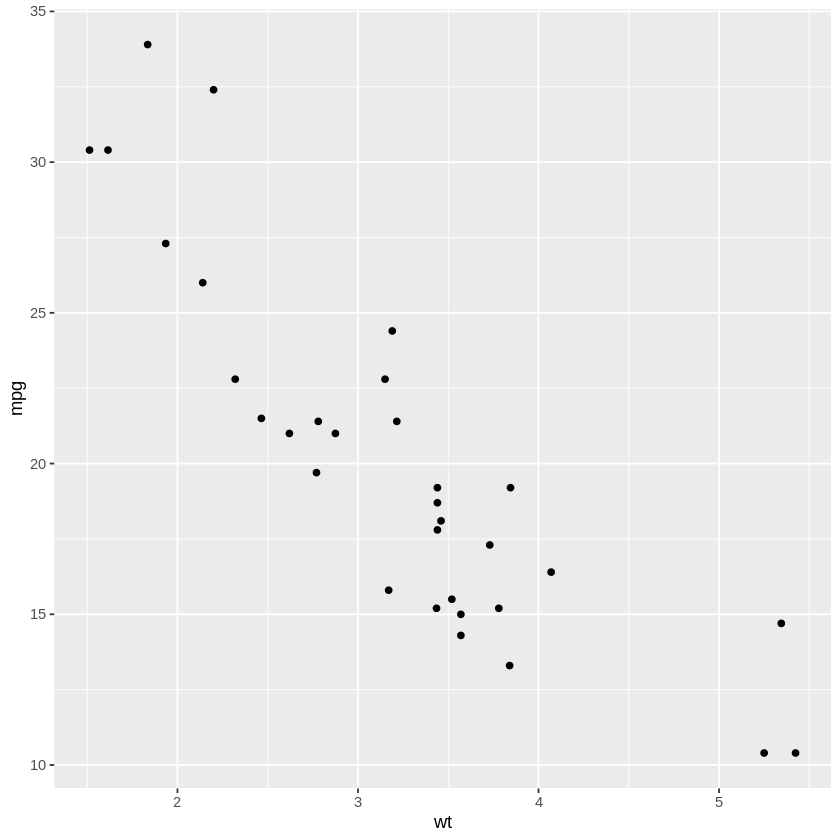

In [6]:
ggplot(df, aes(x=wt, y=mpg)) +
    geom_point()

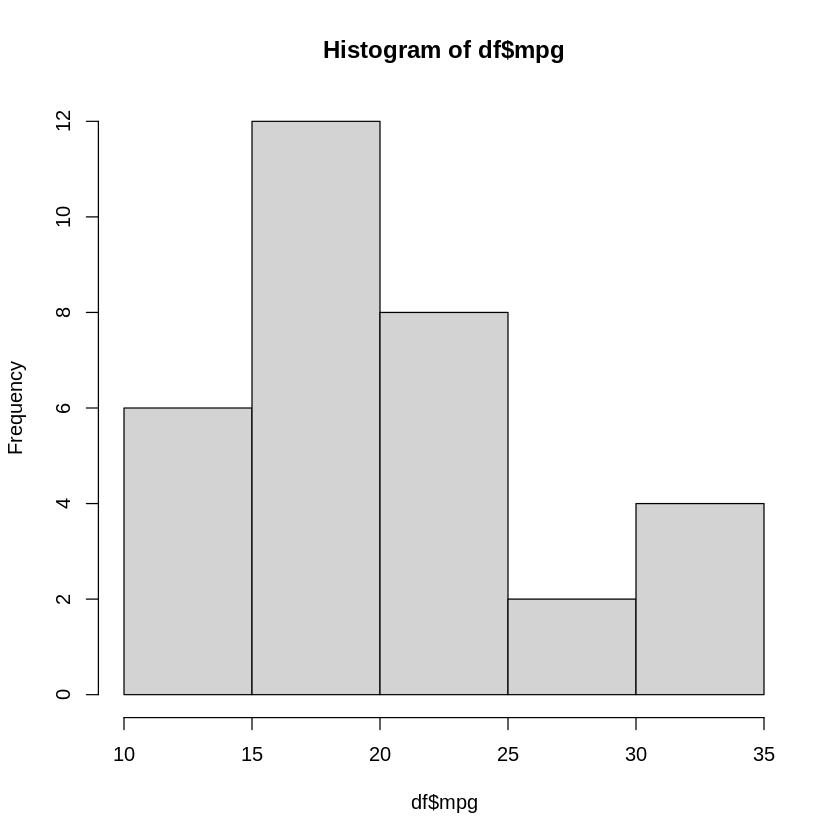

In [7]:
hist(df$mpg)

In [8]:
model = lm(mpg ~ wt, data=df)
summary(model)


Call:
lm(formula = mpg ~ wt, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


In [9]:
pred <- predict(model, data = df$mpg)

[1] "y = 37.285126 + -5.344472 * x"

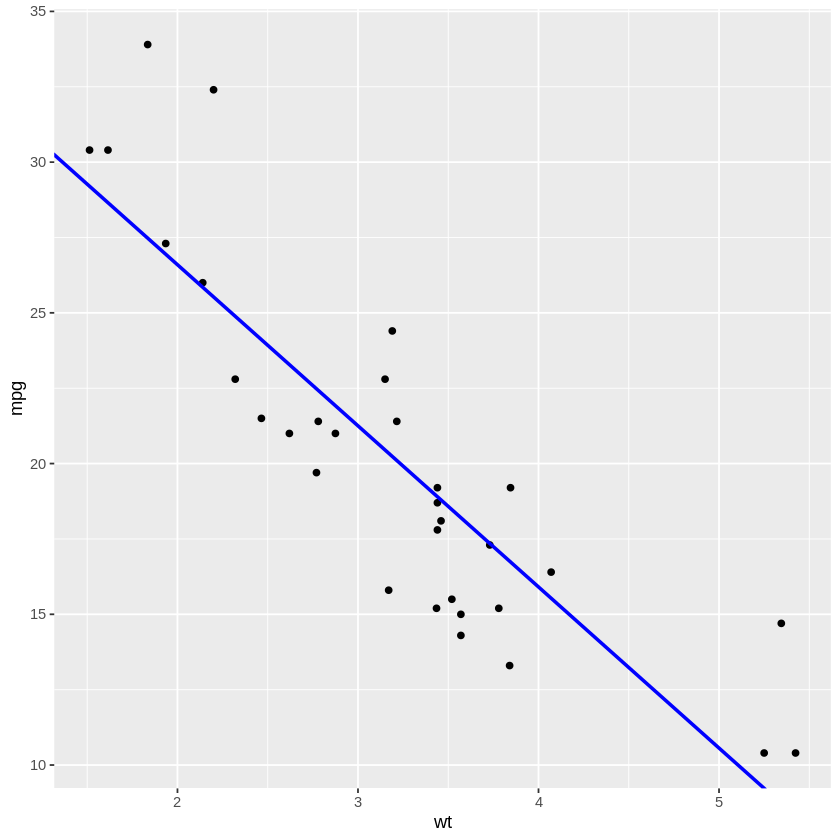

In [10]:
ggplot(df, aes(x=wt, y=mpg)) +
    geom_point() +
      geom_abline(slope=model$coefficients[2],
              intercept=model$coefficients[1],
              color="blue",
              linewidth=1)
sprintf("y = %f + %f * x", model$coefficients[1], model$coefficients[2])

Outcome/Conclusion:

Understood the concept of Simple Linear Regression.

Identified and Explored the data analytics libraries in Python and R.
Performed Simple Linear Regression using the Libraries in Python and R.